### Now , I will use clean bank data to make model.

In [252]:
pip install lightgbm

     |████████████████████████████████| 686kB 654kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import lightgbm as lgb
import seaborn as sns

OSError: dlopen(/Users/kanchansingh/opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/kanchansingh/opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [2]:
pd.set_option('display.max_columns', 23)

In [3]:
pd.set_option('display.max_rows', 999)

In [4]:
bank_model=pd.read_csv('clean_data.csv')

In [5]:
bank_model.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,no
2,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
3,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
4,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no


In [6]:
bank_model[0:].transpose()

,0,1,2,3,4,5,6,7,8,9,10,...,41177,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,9,NaN,5,5,9,NaN,9,NaN,2,2,NaN,...,9,10,10,5,5,3,12,7,9,6,12
education,1,NaN,4,2,4,NaN,5,NaN,5,4,NaN,...,5,6,5,6,6,1,5,5,6,5,5
job_blue-collar,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,1,0,0,0
job_entrepreneur,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0,0
job_housemaid,1,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0,0
job_management,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0,0
job_retired,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,1,1,1,0,0,0,1,0,1,0,1
job_self-employed,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0,0
job_services,0,NaN,1,0,1,NaN,0,NaN,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0,0
job_student,0,NaN,0,0,0,NaN,0,NaN,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0,0


In [7]:
bank_model=bank_model.dropna()

In [8]:
bank_model[0:].transpose()

,0,2,3,4,6,8,9,11,12,13,14,...,41177,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,9,5,5,9,9,2,2,2,3,9,4,...,9,10,10,5,5,3,12,7,9,6,12
education,1,4,2,4,5,5,4,4,4,1,2,...,5,6,5,6,6,1,5,5,6,5,5
job_blue-collar,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0
job_entrepreneur,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0
job_housemaid,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0
job_management,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0
job_retired,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0,1
job_self-employed,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0
job_services,0,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0
job_student,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0


In [9]:
bank_model['education'].unique()

array([1., 4., 2., 5., 3., 6.])

In [10]:
bank_model['month'].unique()

array([6, 4, 3, 1, 8, 7, 2, 5, 0, 9])

In [11]:
bank_model.shape

(30593, 69)

In [12]:
y = pd.get_dummies(bank_model['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [19]:
feat=bank_model.drop(columns=['y'],axis=1)
label=bank_model['y']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 103)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [20]:

# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.30, random_state=42)


print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (21415, 68)
y train size:  (21415,)
X test size:  (9178, 68)
y test size:  (9178,)


In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.svm import SVC

In [36]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

ValueError: pos_label=1 is not a valid label: array(['no', 'yes'], dtype='<U3')

In [25]:
from sklearn.metrics import precision_score, accuracy_score

In [26]:
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
from sklearn.metrics import confusion_matrix, precision_score

In [33]:
from sklearn.model_selection import cross_val_score

In [38]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[8035    0]
 [1143    0]]
88.0


ValueError: pos_label=1 is not a valid label: array(['no', 'yes'], dtype='<U3')

In [187]:
X_train.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_32,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56
33239,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0
30571,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0
7866,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0
26229,4.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0
38761,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0


In [188]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
logmodel = LogisticRegression()

In [191]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
logpred = logmodel.predict(X_test)

In [198]:

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7833  202]
 [ 928  215]]
88.0


In [199]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ValueError: Data is not binary and pos_label is not specified

In [196]:

#LOGMODEL

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


NameError: name 'fprlog' is not defined

k=1 84.98 (+/- 0.37)
k=2 88.76 (+/- 0.25)
k=3 88.00 (+/- 0.23)
k=4 89.00 (+/- 0.19)
k=5 88.64 (+/- 0.17)
k=6 89.03 (+/- 0.13)
k=7 88.83 (+/- 0.20)
k=8 89.12 (+/- 0.24)
k=9 88.96 (+/- 0.29)
k=10 89.10 (+/- 0.24)
The optimal number of neighbors is 7 with 89.1%


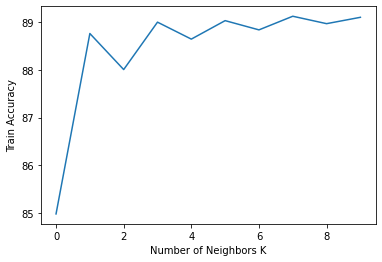

In [133]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(feat,label, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,10)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=5, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'confusion_matrix' is not defined

In [231]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7229  806]
 [ 769  374]]
83.0


In [232]:
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))

Decision Tree Reports
               precision    recall  f1-score   support

          no       0.90      0.90      0.90      8035
         yes       0.32      0.33      0.32      1143

    accuracy                           0.83      9178
   macro avg       0.61      0.61      0.61      9178
weighted avg       0.83      0.83      0.83      9178



In [233]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7663  372]
 [ 800  343]]
87.0


In [234]:
print('Random forest Reports\n',classification_report(y_test, rfcpred))

Random forest Reports
               precision    recall  f1-score   support

          no       0.91      0.95      0.93      8035
         yes       0.48      0.30      0.37      1143

    accuracy                           0.87      9178
   macro avg       0.69      0.63      0.65      9178
weighted avg       0.85      0.87      0.86      9178



In [202]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 327 7708]
 [  21 1122]]
16.0


In [240]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [249]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain['feat'], dtrain['level'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    #print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    #print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
         print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
Baseline Model

SyntaxError: invalid syntax (<ipython-input-249-9fb672bf226c>, line 19)

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7835  200]
 [ 862  281]]
88.0


In [236]:
print('GradientBoost Reports\n',classification_report(y_test, gbkpred))

GradientBoost Reports
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      8035
         yes       0.58      0.25      0.35      1143

    accuracy                           0.88      9178
   macro avg       0.74      0.61      0.64      9178
weighted avg       0.86      0.88      0.86      9178



In [204]:
from sklearn.metrics import classification_report

In [205]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[7801  234]
 [ 912  231]]


Recall - Specificity
TN / (TN + FP) [ MATRIX LINE 1 ]

For all NEGATIVE(0) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 7163+116 = 7279 clients that didin't subscribe(0), and our model predict 98% correct or 7163 correct and 116 incorrect

In [212]:
print(round(7801 /(7801 + 234),2))

0.97


Recall - Sensitivity
TP / (TP + FN) [ MATRIX LINE 2 ]

For all POSITIVE(1) REAL VALUES how much we predict correct ?

other way to understand, our real test set has 7801 + 234 = 8035 clients that subscribe(1), and our model predict 26% correct or 253 correct and 706 incorrect, BUT REMEMBER, its best we miss by False negative instead of False Positive

In [214]:
print(round(7801 /(7801 + 234),2))

0.97


Precision
TN / (TN + FN) [ MATRIX COLUMN 1 ]

For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?

other way to understand, our model pointed 7163 + 706 = 7869 clients that didin't subscribe(0), and our model predict 91% correct or 7163 correct and 706 incorrect

In [215]:
print(round(231 /(231 + 234),2))

0.5


F1-SCORE
F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics
F1 = 2(Precision(0) Recall(0)) / (Precision(0) + Recall(0))

In [216]:
F1_0 = 2*0.97*0.97/(0.97+0.97)
round(F1_0,2)

0.97

In [211]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

          no       0.90      0.97      0.93      8035
         yes       0.50      0.20      0.29      1143

    accuracy                           0.88      9178
   macro avg       0.70      0.59      0.61      9178
weighted avg       0.85      0.88      0.85      9178



In [222]:
print('SVC Confusion Matrix\n', confusion_matrix(y_test, svcpred))

SVC Confusion Matrix
 [[8035    0]
 [1143    0]]


Recall for SVC

In [223]:
print(round(18035 /(18035 + 0),2))

1.0


precision= (TP/TP+FP)

In [228]:
print(round(18035/(18035+1143),2))

0.94


In [229]:
F1_0 = 2*1*1/(1+0.94)
round(F1_0,2)

1.03

In [237]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
6,Gradient Boosting,0.881952
4,Logistic Model,0.876115
3,K-Near Neighbors,0.874621
0,Random Forest Classifier,0.872613
2,Support Vector Machine,0.872519
1,Decision Tree Classifier,0.829606
5,Gausian NB,0.161288


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

In [209]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

          no       0.90      0.97      0.93      8035
         yes       0.50      0.20      0.29      1143

    accuracy                           0.88      9178
   macro avg       0.70      0.59      0.61      9178
weighted avg       0.85      0.88      0.85      9178



In [208]:
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

ValueError: Data is not binary and pos_label is not specified